In [1]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x

def x(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.cos(l*(math.pi/180))

def y(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.sin(l*(math.pi/180))

def z(R, b):
    return R * math.sin(b*(math.pi/180))

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

def badToGood(bad, everything):
    return bad/everything

#https://pages.uoregon.edu/soper/Light/luminosity.html
def luminosity(m, d):
    return 4*math.pi*math.pow(d, 2)*m

def solar_lum(l):
    return l/(3.828*math.pow(10, 26))

def temp(l): #as related to the sun
    sun = 5778
    frac = 1/4
    return math.pow(l, frac) * sun

data = [[-0.31, 34000],[-0.24, 23000],[-0.20, 18500],[-0.12, 13000],[0.0, 9500],[0.15, 8500],[0.29, 7300],
        [0.42, 6600],[0.58, 5900],[0.69, 5600],[0.85, 5100],[1.16, 4200],[1.42, 3700],[1.61,3000]]
df = pd.DataFrame(data, columns = ['b_v', 'temp'])
def approx_temp(ci):
    if ci <= -0.31:
        return 34000
    elif ci <= -0.24:
        return 23000
    elif ci <= -0.2:
        return 18500
    elif ci <= -0.12:
        return 13000
    elif ci <= 0:
        return 9500
    elif ci <= 0.15:
        return 8500
    elif ci <= 0.29:
        return 7300
    elif ci <= 0.42:
        return 6600
    elif ci <= 0.58:
        return 5900
    elif ci <= 0.69:
        return 5600
    elif ci <= 0.85:
        return 5100
    elif ci <= 1.16:
        return 4200
    elif ci <= 1.42:
        return 4200
    else:
        return 3000

def temperature(ci1, ci2):
    return (approx_temp(ci1) + approx_temp(ci2)) / 2

#σ = 5.670374419...×10−8 W⋅m−2⋅K−4
def radius(l, t):
    const = 5.67 * math.pow(10, -8)
    ans = l/(4*math.pi*const*math.pow(t, 4)*l)
    return math.sqrt(ans) #took log to normalize it
  

In [2]:
def uwe(chi2, good_obs):
    u = math.sqrt(chi2/(good_obs-5))
    return u

table = pd.read_csv("table_u0_g_col.csv")
table.fillna(value=0)
narray = table.values
nt = narray.T
arr = list(zip(nt[0],nt[1],nt[2]))
def ruwe(u, g, b_r):
    u0 = bilinear_interpolation(g, b_r, arr)
    return u/u0

def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

        >>> bilinear_interpolation(12, 5.5,
        ...                        [(10, 4, 100),
        ...                         (20, 4, 200),
        ...                         (10, 6, 150),
        ...                         (20, 6, 300)])
        165.0

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')

    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)

In [3]:
# 4 closest points surrouding the point of interest
# trilinear interpolation
# form triangles
# find line closest
# find point across the line
# form equilateral triangles - delaney triangles
# voroni polygon
# anything inside it, is cloesest to that point than any other point
# bilinear interp of points around the polygon

In [4]:
table = pd.read_csv("table_u0_g_col.csv")
table.fillna(value=0)
narray = table.values
nt = narray.T
list(zip(nt[0],nt[1],nt[2]))

[(3.6, -1.0, 19.50768),
 (3.6, -0.9, 19.254451),
 (3.6, -0.8, 18.999339000000003),
 (3.6, -0.7, 18.742264000000002),
 (3.6, -0.6, 18.483145999999998),
 (3.6, -0.5, 18.221897),
 (3.6, -0.4, 17.958425),
 (3.6, -0.3, 17.692629),
 (3.6, -0.2, 17.424404),
 (3.6, -0.1, 17.153636),
 (3.6, 0.0, 16.880202),
 (3.6, 0.1, 16.60397),
 (3.6, 0.2, 16.324799),
 (3.6, 0.3, 16.041653),
 (3.6, 0.4, 15.753418),
 (3.6, 0.5, 15.459810999999998),
 (3.6, 0.6, 15.160518),
 (3.6, 0.7, 14.855197),
 (3.6, 0.8, 14.543467000000001),
 (3.6, 0.9, 14.224907),
 (3.6, 1.0, 13.912904999999999),
 (3.6, 1.1, 13.622063),
 (3.6, 1.2, 13.353766),
 (3.6, 1.3, 13.115259),
 (3.6, 1.4, 12.914147999999999),
 (3.6, 1.5, 12.752203),
 (3.6, 1.6, 12.623635),
 (3.6, 1.7, 12.522119),
 (3.6, 1.8, 12.448315),
 (3.6, 1.9, 12.397342),
 (3.6, 2.0, 12.364086),
 (3.6, 2.1, 12.348692),
 (3.6, 2.2, 12.344736),
 (3.6, 2.3, 12.345739),
 (3.6, 2.4, 12.351697999999999),
 (3.6, 2.5, 12.360132),
 (3.6, 2.6, 12.36856),
 (3.6, 2.7, 12.376983000000001),


In [5]:
#keep trying to work with the table, ex replace nan with 0

table = pd.read_csv("table_u0_g_col.csv")
table.describe()
table.fillna(value=0)
#plt.plot(table['g_mag'])#, table['bp_rp']) 
#plt.show()

,g_mag,bp_rp,u0
0,3.6,-1.0,19.507680
1,3.6,-0.9,19.254451
2,3.6,-0.8,18.999339
3,3.6,-0.7,18.742264
4,3.6,-0.6,18.483146
...,...,...,...
193246,21.0,9.6,1.227734
193247,21.0,9.7,1.230385
193248,21.0,9.8,1.233040
193249,21.0,9.9,1.235699


In [6]:
list(table)

['g_mag', ' bp_rp', ' u0']

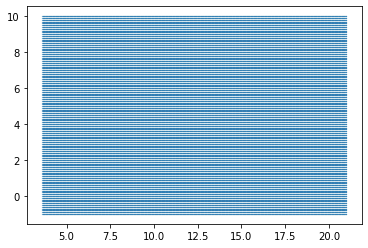

In [7]:
plt.scatter(table['g_mag'], table[' bp_rp'], s=0.01) 
plt.show()

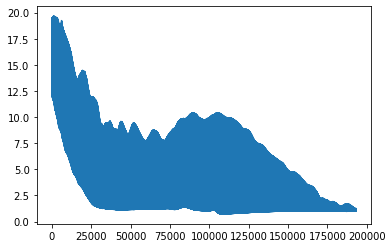

In [8]:
plt.plot(table[' u0'])
plt.show()

In [9]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 50 and 60 AND
#DEC between 20 and 30 AND
#parallax > 6.2 AND parallax < 12.5
pleiades = pd.read_csv("pleiades_ra_dec.csv")
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'magnitude'] = pleiades.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
pleiades.loc[:, 'luminosity'] = pleiades.apply(lambda x: luminosity(x['phot_g_mean_mag'], x['R']), axis=1)
pleiades.loc[:, 'solar_luminosity'] = pleiades.apply(lambda x: solar_lum(x['luminosity']), axis=1)
#pleiades.loc[:, 'temperature'] = pleiades.apply(lambda x: temp(x['solar_luminosity']), axis=1)
#pleiades.loc[:, 'approx_temp'] = pleiades.apply(lambda x: temperature(x['g_rp'], x['bp_rp']), axis=1)
pleiades.loc[:, 'radius'] = pleiades.apply(lambda x: radius(x['luminosity'], x['teff_val']), axis=1) #phot_g_mean_mag
#pleiades.loc[:, 'ruwe'] = pleiades.apply(lambda x: ruwe(x['astrometric_chi2_al'], x['astrometric_n_good_obs_al'], x['phot_g_mean_mag'], x['bp_rp']), axis=1)
pleiades

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,parallax_arcsec,R,magnitude,luminosity,solar_luminosity,radius
0,1635721458409799680,Gaia DR2 167192841928924288,167192841928924288,641048407,2015.5,58.934499,0.034022,29.793913,0.016739,11.264989,...,0.258769,0.261472,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.011265,88.770612,6.302742,1.093649e+06,2.856974e-21,0.000051
1,1635721458409799680,Gaia DR2 167174356389697024,167174356389697024,740024989,2015.5,59.167402,0.042726,29.610862,0.020024,7.193312,...,0.320935,0.326991,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.007193,139.018027,6.034949,2.853654e+06,7.454685e-21,0.000049
2,1635721458409799680,Gaia DR2 167009979401844352,167009979401844352,943924294,2015.5,57.893316,0.089139,28.713266,0.032976,9.398327,...,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.009398,106.401916,10.201275,2.181833e+06,5.699668e-21,0.000076
3,1635721458409799680,Gaia DR2 167016645191076736,167016645191076736,879882240,2015.5,57.932714,0.107632,28.789660,0.043700,9.797660,...,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.009798,102.065184,10.807381,2.075118e+06,5.420894e-21,0.000070
4,1635721458409799680,Gaia DR2 167094195120335616,167094195120335616,287832684,2015.5,59.446019,0.032103,29.138054,0.013008,6.268210,...,0.123923,0.127418,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.006268,159.535176,7.397486,4.289521e+06,1.120565e-20,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,1635721458409799680,Gaia DR2 119533685788069248,119533685788069248,205192079,2015.5,54.686939,0.051646,28.616296,0.026827,11.449932,...,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.011450,87.336764,8.617814,1.277121e+06,3.336262e-21,0.000074
1807,1635721458409799680,Gaia DR2 119417000116772736,119417000116772736,1183778215,2015.5,53.059122,0.057873,27.688789,0.034161,9.125883,...,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.009126,109.578437,9.717973,2.250764e+06,5.879738e-21,0.000101
1808,1635721458409799680,Gaia DR2 119423459747572480,119423459747572480,1602012555,2015.5,53.035060,0.040353,27.838279,0.024380,9.443305,...,0.190506,0.192886,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.009443,105.895134,6.656124,1.660067e+06,4.336644e-21,0.000053
1809,1635721458409799680,Gaia DR2 119351540518524160,119351540518524160,1234460667,2015.5,53.345187,0.037652,27.480354,0.022631,8.121709,...,0.114216,0.116050,https://gea.esac.esa.int/data-server/datalink/...,NaN,0.008122,123.126789,7.470596,2.461823e+06,6.431094e-21,0.000068


In [10]:
#RUWE
#renormalized unit weight error
pleiades.loc[:, 'uwe'] = pleiades.apply(lambda x: uwe(x['astrometric_chi2_al'], x['astrometric_n_good_obs_al']), axis=1)



In [11]:
pleiades.loc[:, 'ruwe'] = pleiades.apply(lambda x: ruwe(x['uwe'], x['phot_g_mean_mag'], x['bp_rp']), axis=1)


ValueError: ('too many values to unpack (expected 4)', 'occurred at index 0')

In [ ]:
p = pleiades[['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'astrometric_n_bad_obs_al', 
              'astrometric_n_obs_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'duplicated_source', 'phot_g_mean_mag', 
              'visibility_periods_used', 'g_rp', 'bp_rp', 'b', 'l', 'R', 'magnitude', 'luminosity', 'solar_luminosity', 'teff_val', 'radius', 'uwe']]#, 'ruwe']]
p

In [ ]:
plt.hist(p['uwe'], bins=1000)
plt.xlabel('uwe')
plt.ylabel('density')
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
plt.hist(p['ruwe'], bins=100)
plt.xlabel('ruwe')
plt.ylabel('density')
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
import seaborn as sns
sns.distplot(p['uwe'], hist=True, kde=True, bins=1000) #what kinds of function?
plt.ylabel('density')
plt.xlim(0,10)
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
plt.hist(p['ra'], bins=100)
plt.xlabel('ra')
plt.ylabel('density')
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
plt.hist(p['dec'], bins=100)
plt.xlabel('dec')
plt.ylabel('density')
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['magnitude'], s=2)
ax.set_ylim(13, -5)
ax.set_title('Pleiades g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['magnitude'], s=2)
ax2.set_ylim(13, -5)
ax2.set_title('Pleiades b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(p['g_rp'], p['magnitude'], s=2)
ax.set_title('Pleiades g-r')
ax.set_xlabel("color index (g-rp)")
ax.set_ylabel("abs mag (g)")
ax.set_xlim(.4, 1)
ax.set_ylim(4, -2)

ax2 = fig.add_subplot(122)
ax2.scatter(p['bp_rp'], p['magnitude'], s=2)
ax2.set_title('Pleiades b-r')
ax2.set_xlabel("color index (bp-rp)")
ax2.set_ylabel("abs mag (g)")
ax2.set_xlim(.9, 1.5)
ax2.set_ylim(4, -2)

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
count = 0
arr = []
for star in p.itertuples():
    if star.bp_rp <= 1.5 and star.bp_rp >= .9:
        if star.magnitude <= 4 and star.magnitude >= -2:
            arr.append([star.source_id, star.ra, star.dec, star.astrometric_chi2_al])
            count += 1
print(count)

data = np.array(arr)
data
df_hr_p1 = pd.DataFrame(data, columns=['source_id', 'ra', 'dec', 'astrometric_chi2_al'])
df_hr_p1 = df_hr_p1.round(4)
df_hr_p1.head(10)

In [ ]:
#parallax error
x = 1/10
for index, row in p.iterrows():
    if row['parallax_error']/row['parallax'] >= x:
        p = p.drop([index])
        #print(row['parallax_error'], row['parallax'])
p

In [ ]:
#duplicate source - look at id's and see if they're the same
for index, row in p.iterrows():
    if row['duplicated_source'] == True:
        p = p.drop([index])
p

In [ ]:
#astronometric excess noise
x = 1
for index, row in p.iterrows():
    if row['astrometric_excess_noise'] >= x:
        #print(row['astrometric_excess_noise'])
        p = p.drop([index])
p

In [ ]:
plt.hist(p['astrometric_n_obs_al'], bins=100)
plt.ylim(0,30)
plt.xlim(0,150)
plt.show()

In [ ]:
#number of observations
x = 110
for index, row in p.iterrows():
    if row['astrometric_n_obs_al'] <= x:
        p = p.drop([index])
p

In [ ]:
p.loc[:, 'ratio'] = p.apply(lambda x: badToGood(x['astrometric_n_bad_obs_al'], x['astrometric_n_obs_al']), axis=1)
plt.hist(p['ratio'], bins=100)
plt.show()

In [ ]:
plt.hist(p['visibility_periods_used'], bins=100)
#plt.ylim(0,30)
#plt.xlim(0,150)
plt.show()

In [ ]:
#visibility periods used
x = 5
for index, row in p.iterrows():
    if row['visibility_periods_used'] <= x:
        p = p.drop([index])
p

In [ ]:
#x=1.4
#for index, row in p.iterrows():
#    if row['uwe'] >= x: #should be ruwe, but we don't have that to work with right now
#        p = p.drop([index])
#p

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(121)
ax3.scatter(p['g_rp'], p['magnitude'], s=2)
ax3.set_ylim(13, -5)
ax3.set_title('Pleiades g-r')
ax3.set_xlabel("color index (g-rp)")
ax3.set_ylabel("abs mag (g)")

ax4 = fig.add_subplot(122)
ax4.scatter(p['bp_rp'], p['magnitude'], s=2)
ax4.set_ylim(13, -5)
ax4.set_title('Pleiades b-r')
ax4.set_xlabel("color index (bp-rp)")
ax4.set_ylabel("abs mag (g)")

plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(131)
ax3.scatter(p['g_rp'], p['magnitude'], s=2)
ax3.set_title('Pleiades g-r')
ax3.set_xlabel("color index (g-rp)")
ax3.set_ylabel("abs mag (g)")
ax3.set_xlim(.4, 1)
ax3.set_ylim(4, -2)

ax4 = fig.add_subplot(132)
ax4.scatter(p['bp_rp'], p['magnitude'], s=2)
ax4.set_title('Pleiades b-r')
ax4.set_xlabel("color index (bp-rp)")
ax4.set_ylabel("abs mag (g)")
ax4.set_xlim(.9, 1.5)
ax4.set_ylim(4, -2)

ax5 = fig.add_subplot(133)
ax5.scatter(p['bp_rp'], p['magnitude'], s=2)
ax5.set_title('Pleiades b-r')
ax5.set_xlabel("color index (bp-rp)")
ax5.set_ylabel("abs mag (g)")
ax5.set_xlim(-.5, 0)
ax5.set_ylim(12, 10)

plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

In [ ]:
count = 0
arr = []
for star in p.itertuples():
    if star.bp_rp <= 1.5 and star.bp_rp >= .9:
        if star.magnitude <= 4 and star.magnitude >= -2:
            arr.append([star.source_id, star.ra, star.dec, star.g_rp, star.bp_rp, star.astrometric_chi2_al, star.teff_val])
            count += 1
print(count)

data = np.array(arr)
data
df_hr_p2 = pd.DataFrame(data, columns=['source_id', 'ra', 'dec', 'g_rp', 'bp_rp', 'astrometric_chi2_al', 'teff_val'])
df_hr_p2 = df_hr_p2.round(4)
df_hr_p2.head(10)

#part of pleiades: index 3

In [ ]:
count = 0
arr = []
for star in p.itertuples():
    if star.bp_rp <= 0 and star.bp_rp >= -.5:
        if star.magnitude <= 11 and star.magnitude >= 10:
            arr.append([star.source_id, star.ra, star.dec, star.g_rp, star.bp_rp, star.astrometric_chi2_al, star.teff_val])
            count += 1
print(count)

data = np.array(arr)
data
df_hr_p3 = pd.DataFrame(data, columns=['source_id', 'ra', 'dec', 'g_rp', 'bp_rp', 'astrometric_chi2_al', 'teff_val'])
df_hr_p3 = df_hr_p3.round(4)
df_hr_p3

In [ ]:
p

In [ ]:
arr = []
count = 0
for star in p.itertuples():
    if star.uwe >= 4:
        arr.append([star.source_id, star.ra, star.dec, star.magnitude, star.bp_rp])
        count += 1

print(count)

In [ ]:
data = np.array(arr)
data
df_uwe = pd.DataFrame(data, columns=['source_id', 'ra', 'dec', 'magnitude', 'bp_rp'])
df_uwe = df_uwe.round(4)
df_uwe.head(10)

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.scatter(p['bp_rp'], p['magnitude'], s=2)
ax3.set_ylim(13, -5)
ax3.set_title('Pleiades g-r')
ax3.set_xlabel("color index (bp-rp)")
ax3.set_ylabel("abs mag (g)")

plt.scatter(df_uwe['bp_rp'], df_uwe['magnitude'], s=20)
plt.ylim(13, -5)
plt.subplots_adjust(0.2, 0.2, 1.7, 1.7)
plt.show()

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.scatter(p['bp_rp'], p['phot_g_mean_mag'], s=2)
ax3.set_ylim(20, -5)
ax3.set_title('Pleiades g-r')
ax3.set_xlabel("color index (bp-rp)")
ax3.set_ylabel("abs mag (g)")

plt.show()

In [ ]:
correct = 0
incorrect = 0
arr = []
variables_id = pd.Series(list(df_hr_p2['source_id']))
for star in df_uwe.itertuples():
    #if star.labels == 2:
        if star.source_id in variables_id.unique():
            arr.append([star.source_id, star.ra, star.dec])
            correct += 1
        else:
            incorrect += 1
            
print("Similar: ", correct)
data = np.array(arr)
data
df_similar = pd.DataFrame(data, columns=['source_id', 'ra', 'dec'])
df_similar = df_similar.round(4)
df_similar.head(10)

In [ ]:
#temp
def colorTemperatureToRGB(kelvin, color):
    temp = kelvin / 100
    red = 0
    green = 0
    blue = 0
    if temp <= 66:
        red = 255
        green = temp
        green = 99.4708025861 * math.log(green) - 161.1195681661

        if temp <= 19:
            blue = 0
        else:
            blue = temp-10
            blue = 138.5177312231 * math.log(blue) - 305.0447927307

    else:
        red = temp - 60
        red = 329.698727446 * math.pow(red, -0.1332047592)
        green = temp - 60
        green = 288.1221695283 * math.pow(green, -0.0755148492 )
        blue = 255

    if color=='red':
        return clamp(red, 0, 255)
    elif color == 'green':
        return clamp(green, 0, 255)
    elif color == 'blue':
        return clamp(blue, 0, 255)
    else:
        return 0

def clamp( x, min, max ):

    if x<min:
        return min
    if x>max:
        return max

    return x

In [ ]:
pleiades.loc[:, 'red'] = pleiades.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'red'), axis=1)
pleiades.loc[:, 'green'] = pleiades.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'green'), axis=1)
pleiades.loc[:, 'blue'] = pleiades.apply(lambda x: colorTemperatureToRGB(x['teff_val'], 'blue'), axis=1)
pleiades.loc[:, 'x'] = pleiades.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'y'] = pleiades.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
pleiades.loc[:, 'z'] = pleiades.apply(lambda r: z(r['R'], r['b']), axis=1)
pleiades

In [ ]:
def uwe(chi2, good_obs):
    u = math.sqrt(chi2/(good_obs-5))
    return u

table = pd.read_csv("table_u0_g_col.csv")
table.fillna(value=0)
narray = table.values
nt = narray.T
arr = list(zip(nt[0],nt[1],nt[2]))
def ruwe(u, g, b_r):
    u0 = bilinear_interpolation(g, b_r, arr)
    return u/u0

def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

        >>> bilinear_interpolation(12, 5.5,
        ...                        [(10, 4, 100),
        ...                         (20, 4, 200),
        ...                         (10, 6, 150),
        ...                         (20, 6, 300)])
        165.0

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')

    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)

In [ ]:
n = [(54.5, 17.041667, 31.993),
     (54.5, 17.083333, 31.911),
     (54.458333, 17.041667, 31.945),
     (54.458333, 17.083333, 31.866)]
bilinear_interpolation(54.4786674627, 17.0470721369, n)


In [ ]:
arr

In [ ]:
arr[int(len(arr)/2)]

In [ ]:
bilinear_interpolation(3.623947843532, 17.0470721369, arr)

In [ ]:
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from scipy.spatial import SphericalVoronoi
from mpl_toolkits.mplot3d import proj3d

In [ ]:
from scipy.spatial import Voronoi
vor = Voronoi(arr)

In [ ]:
vor.vertices

In [ ]:
radius = 1
center = arr[int(len(arr)/2)]
sv = SphericalVoronoi(arr, radius, center)

In [ ]:
from scipy.spatial import Delaunay

tri = Delaunay(arr)

In [ ]:
plt.triplot(arr[:,0], arr[:,1], tri.simplices.copy())
plt.plot(arr[:,0], arr[:,1], 'o')
plt.show()

In [ ]:
t = tri.points[tri.vertices]
# Triangle vertices
A = t[:,0,:].T
B = t[:,1,:].T
C = t[:,2,:].T

# See http://en.wikipedia.org/wiki/Circumscribed_circle#Circumscribed_circles_of_triangles
# The following is just a direct transcription of the formula there
a = A - C
b = B - C

In [ ]:
def dot2(u, v):
    return u[0]*v[0] + u[1]*v[1]

def cross2(u, v, w):
    """u x (v x w)"""
    return dot2(u, w)*v - dot2(u, v)*w

def ncross2(u, v):
    """|| u x v ||^2"""
    return sq2(u)*sq2(v) - dot2(u, v)**2

def sq2(u):
    return dot2(u, u)

In [ ]:
cc = cross2(sq2(a) * b - sq2(b) * a, a, b) / (2*ncross2(a, b)) + C

In [ ]:
# Grab the Voronoi edges
vc = cc[:,tri.neighbors]
vc[:,tri.neighbors == -1] = np.nan # edges at infinity, plotting those would need more work...

lines = []
lines.extend(zip(cc.T, vc[:,:,0].T))
lines.extend(zip(cc.T, vc[:,:,1].T))
lines.extend(zip(cc.T, vc[:,:,2].T))

In [ ]:
from bisect import bisect
def getU0(phot_g_mean_mag, bp_rp):
    g_mag0, bp_rp0, u0 = np.loadtxt('table_u0_g_col.txt', unpack=True, delimiter=',')

    allpoints = []
    g_up =[]
    g_lo=[]
    bprp_up=[]
    bprp_lo=[]
    realg = []
    realbp=[]
    n1111=0
    print(len(bp_rp0))
    for k in range(len(phot_g_mean_mag)):
        a = bisect(g_mag0,  phot_g_mean_mag[k])
        g_up.append(g_mag0[a+1])
        g_lo.append(g_mag0[a-1])
        #g_up.append(round(k,2)+0.01)
       # g_lo.append(round(k,2)-0.01)
        realg.append(phot_g_mean_mag[k])
    for j in range(len(bp_rp)):
        n1111+=1
        #print(type(np.float(bp_rp[j])))
        a = bisect(bp_rp0, np.float(bp_rp[j]))
        if(a+1 <= len(bp_rp0)):
            bprp_up.append(bp_rp0[a+1])
            bprp_lo.append(bp_rp0[a-1])
     #   bprp_up.append(round(j,1)+0.1)
      #  bprp_lo.append(round(j,1)-0.1)
        realbp.append(bp_rp[j])
        #print(bprp_idx)
    n0_help=0
    for b in range(len(bprp_lo)):
        n0_help+=1
        #print(n0_help)
        points=[]
        for n in range(len(u0)):
            if (g_mag0[n]==g_up[b]) & (bp_rp0[n]==bprp_up[b]):
                g_up_b_up_u0 = u0[n]
                points.append((g_mag0[n], bp_rp0[n], u0[n]))
                #print('1')
            elif (g_mag0[n]==g_up[b]) & (bp_rp0[n]==bprp_lo[b]):
                g_up_b_lo_u0 = u0[n]
                points.append((g_mag0[n], bp_rp0[n], u0[n]))
                #print('2')

            elif (g_mag0[n]==g_lo[b]) & (bp_rp0[n]==bprp_lo[b]):
                g_lo_b_lo_u0 = u0[n]
                points.append((g_mag0[n], bp_rp0[n], u0[n]))
                #print('3')

            elif (g_mag0[n]==g_lo[b]) & (bp_rp0[n]==bprp_up[b]):
                g_lo_b_up_u0 = u0[n]
                points.append((g_mag0[n], bp_rp0[n], u0[n]))
                #print('4')

        allpoints.append([realg[b], realbp[b], points])
        #print(allpoints)
    print(allpoints[-1])        
        
    return allpoints

In [ ]:
bilinear_input = getU0(pleiades['phot_g_mean_mag'], pleiades['bp_rp'])

In [ ]:
bilinear_input[0][2]

In [ ]:
for index, star in pleiades.iterrows():
    for item in bilinear_input:
        if star['phot_g_mean_mag'] == item[0]:
            if star['bp_rp'] == item[1]:
                try:
                    pleiades.at[index, 'bilinear_interp'] = bilinear_interpolation(item[0], item[1], item[2])
                except:
                    pleiades.at[index, 'bilinear_interp'] = 'NaN'

In [ ]:
pleiades.head(20)

In [ ]:
table = pd.read_csv("table_u0_g_col.csv")
table.fillna(value=0)
narray = table.values
nt = narray.T
arr = list(zip(nt[0],nt[1],nt[2]))

In [ ]:
this = narray.tolist()
arrx = []
arry = []
arrz = []
for i in this:
    arrx.append(i[0])
    arry.append(i[1])
    arrz.append(i[2])

In [ ]:
from scipy import interpolate

test = []

for i in range(0, len(arrx)):
    test.append(interpolate.interp2d(arrx[i], arry[i], arrz[i], kind='linear'))